<a href="https://colab.research.google.com/github/Hari-R03/Big-Data-Analysis/blob/main/Hari_True_or_False_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRUE FALSE NEWS DETECTION

# Importing the Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# importing libraries for analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# importing libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#Evaluating the model using the metrics library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score as CVS

#Used for Saving the model
import pickle

# Data Uploading

In [ ]:
tr = pd.read_csv('/content/train.csv')
#Calling the train datasets

In [ ]:
te = pd.read_csv('/content/test.csv')
#Calling the test datasets

# Data Structure And Contents

In [ ]:
tr.shape
#No of Rows and Columns in Trainset

(20800, 5)

In [ ]:
te.shape
#No of Rows and Columns in Testset

(5200, 4)

In [ ]:
tr.dtypes
#Atributes of Data Columns in Trainset

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [ ]:
te.dtypes
#Atributes of Data Columns in Testset

id         int64
title     object
author    object
text      object
dtype: object

In [ ]:
tr.columns
#No of Columns in Trainset

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
te.columns
#No of Columns in Testset

Index(['id', 'title', 'author', 'text'], dtype='object')

In [ ]:
tr.info()
#Summary of the Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
te.info()
#Summary of the Test Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
tr.isnull().sum()
#Finding the null Values of the trainset

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
te.isnull().sum()
#Finding the null Values of the testset

id          0
title     122
author    503
text        7
dtype: int64

In [ ]:
tr.head()
#Least 5 values of the train dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
te.head()
#Least 5 values of the test dataset

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
tr.tail()
#Highest 5 values of  train dataset

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [ ]:
te.tail()
#Highest 5 values of test dataset

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


# Data Processing

## Removal of Null values

In [ ]:
tr = tr.fillna('')


In [ ]:
tr.isnull().sum()
#Removing null values from train set.

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
tr['subject'] = tr['author']+""+tr['title']
#Assessing the author and title column in trainset

In [ ]:
te = te.fillna('')

In [ ]:
te.isnull().sum()
#Removing null values from test set.

id        0
title     0
author    0
text      0
dtype: int64

In [ ]:
te['subject'] = te['author']+""+te['title']
#Assessing the author and title column in testset

## Tokenization

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#Importing the tokenizing libraries

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tr['Tokens'] = tr['subject'].apply(word_tokenize)
#Creating new column in trainset

In [ ]:
tr.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [ ]:
te['tokens'] = te['subject'].apply(word_tokenize)
#Creating new column in testset

In [ ]:
te.head()

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...


## Lower Casing the text

In [ ]:
tr = tr.apply(lambda x: x.astype(str).str.lower())
#Converting the text in subject column of trainset

In [ ]:
tr.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [ ]:
te = te.apply(lambda x: x.astype(str).str.lower())
#Converting the text in subject column of testset

In [ ]:
te.head()

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...


## Removal of Punctuations

In [ ]:
tr['subject'] = tr['subject'].str.replace('[^\w\s]','')
#Removing the punctuation marks and white space in trainset

In [ ]:
te['subject'] = te['subject'].str.replace('[^\w\s]','')
#Removing the punctuation marks and white space in testset

## Removal of stopwords

In [ ]:
nltk.download('stopwords')
#Downloading list of stopwords from dataset

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
St_words = set(stopwords.words('english'))
print(St_words)
#Stopwords of Dataset

{'of', 'too', 'are', 'down', 'both', 'her', 'myself', "isn't", 'yourself', 'those', 'more', 'herself', 'just', 'd', 'the', 'now', 'an', 'up', 'does', 'by', 'my', "don't", 'ourselves', 'me', "doesn't", 'against', 'this', 'until', 'between', 'very', "you've", 'which', 'for', 'other', 'theirs', 'being', 'ma', 'once', "mightn't", "aren't", "didn't", 'into', 't', 'them', "you'd", 'ours', 'you', 'further', 'some', 'o', 'if', "you'll", 'were', 'our', 'haven', 'your', 'but', 'he', 'wouldn', 'with', 'ain', 'aren', 'through', "shan't", 'yourselves', 'been', 'had', "you're", 'has', 'be', 'a', 'have', 'its', 'each', "hasn't", 'as', 'weren', 'any', 'was', 'most', 'above', 'i', 'didn', 've', "weren't", "wouldn't", 'how', 'no', 'll', 'off', "she's", 'own', "that'll", 'than', 'hadn', "mustn't", "wasn't", 'again', 'under', 'who', 'why', 'she', 'few', 'him', 'do', "hadn't", 'nor', 'wasn', 'here', 'such', 'isn', 'while', 'hers', 'his', 'can', 'did', 'couldn', "it's", 'is', 'out', "haven't", 'on', 'becaus

In [ ]:
tr['subject'] = tr['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in St_words]))
#Removing Stopwords in trainset

In [ ]:
tr.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy Truth Might Get You Fired,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed fictional u...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [ ]:
te['subject'] = te['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in St_words]))
#Removing Stopwords in testset

In [ ]:
te.head()

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","David StreitfeldSpecter Trump Loosens Tongues,..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready strike terrorists near ...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...


## Stemming or Lemmetization

In [ ]:
stemmer = PorterStemmer()
tr['subject'] = tr['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
#Splitting the words in subject column of trainset

In [ ]:
tr.head()

,id,title,author,text,label,subject,Tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucushous dem aide: we didn’t even see ...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillari clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhi truth might get you fire,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilian kill in singl us ai...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jail fiction unpub...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


In [ ]:
tr.tail()

,id,title,author,text,label,subject,Tokens
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,jerom hudsonrapp t.i.: trump ’poster child for...,"[Jerome, HudsonRapper, T.I, ., :, Trump, a, ’,..."
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"benjamin hoffmann.f.l. playoffs: schedule, mat...","[Benjamin, HoffmanN.F.L, ., Playoffs, :, Sched..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,michael j. de la merc rachel abramsmacy’ is sa...,"[Michael, J., de, la, Merced, and, Rachel, Abr..."
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"alex ansarynato, russia to hold parallel exerc...","[Alex, AnsaryNATO, ,, Russia, To, Hold, Parall..."
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1,david swansonwhat keep f-35 aliv,"[David, SwansonWhat, Keeps, the, F-35, Alive]"


In [ ]:
stemmer = PorterStemmer()
te['subject'] = te['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
#Splitting the words in subject column of testset

In [ ]:
te.head()

,id,title,author,text,subject
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","david streitfeldspect trump loosen tongues, no..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,russian warship readi strike terrorist near al...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,common dreams#nodapl: nativ american leader vo...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",daniel victortim tebow will attempt anoth come...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,truth broadcast networkkeis report: meme war (...


In [ ]:
te.tail()

,id,title,author,text,subject
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,jodi rosenth bangladeshi traffic jam that neve...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,sheryl gay stolbergjohn kasich sign one abort ...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,"mike mcphatecalifornia today: what, exactly, i..."
5198,25998,300 US Marines To Be Deployed To Russian Borde...,,« Previous - Next » 300 US Marines To Be Deplo...,300 us marin to be deploy to russian border in...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...,"teddi wayneawkward sex, onscreen off - the new..."


# Model Building

In [ ]:
x=tr['subject']
y=tr['label']

vectorizer=TfidfVectorizer()
vectorizer.fit(x)
x=vectorizer.transform(x)

print(x)
#Splitting the variables as x and y

  (0, 31241)	0.18699888924458613
  (0, 30373)	0.2776027732834777
  (0, 30025)	0.2512808541494457
  (0, 25962)	0.21975821872832688
  (0, 17294)	0.36837958873467835
  (0, 16779)	0.24992443496479297
  (0, 14871)	0.2108858595431237
  (0, 14662)	0.15502698169971413
  (0, 9510)	0.19815662616146779
  (0, 7774)	0.2519787565152592
  (0, 7473)	0.246741751256408
  (0, 7131)	0.3039822438189489
  (0, 5995)	0.21179580289281727
  (0, 5121)	0.3105350341795275
  (0, 1092)	0.33544732783862846
  (1, 31875)	0.36688013213305515
  (1, 13179)	0.2508638367430399
  (1, 10401)	0.5226747357728401
  (1, 7072)	0.31638169487081524
  (1, 5729)	0.23248708292981804
  (1, 4724)	0.464055696418436
  (1, 4074)	0.18539331285820687
  (1, 3350)	0.35413476846519715
  (2, 32240)	0.2742248291030988
  (2, 29913)	0.35231330356872237
  :	:
  (20797, 23457)	0.24594154038621968
  (20797, 20012)	0.07766880563786711
  (20797, 18703)	0.1756255138496239
  (20797, 18597)	0.32201740124102296
  (20797, 16272)	0.22392744673846166
  (20797, 

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into two sets



In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x, tr['label'], test_size = 0.2,stratify = tr['label'],random_state = 42)


In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
#Used to train linear regression in trainset

LogisticRegression()

In [ ]:
y_predict=lr.predict(X_train)
#Predicting the values


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#importing the libraries

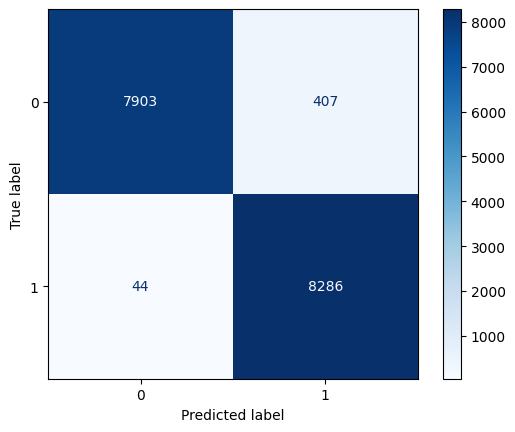

In [ ]:
cm=confusion_matrix(Y_train,y_predict)
d=ConfusionMatrixDisplay(confusion_matrix=cm)
d.plot(cmap=plt.cm.Blues)
plt.show()
#Plotting the graph between

# Evaluating the Model

In [ ]:
X_tt_predict = lr.predict(X_test)

In [ ]:
accuracy =accuracy_score(Y_test,X_tt_predict)
precision = precision_score(Y_test,X_tt_predict)
recall = recall_score(Y_test,X_tt_predict)
f1 = f1_score(Y_test,X_tt_predict)


In [ ]:
#Show the output
print('Testing Accuracy:',accuracy)
print('Testing Precision:',precision)
print('Testing Recall:',recall)
print('Testing F1 Score:',f1)

Testing Accuracy: 0.9533653846153847
Testing Precision: 0.9210878288007134
Testing Recall: 0.9918386941910706
Testing F1 Score: 0.9551548774849746


# Saving the Model

In [ ]:
tfp = "true_Fake_News_Prediction.sav"
pickle.dump(lr,open(tfp,'wb'))